In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

fnames = ['totalArea', 'roofedSurface', 'bedrooms', 'bathrooms', 'halfBathrooms',
            'antiquity', 'parkingSlots', 'priceAmount', 'priceCurrencyId']

In [3]:
buy_df = pd.read_csv("miraflores_buy.csv")
buy_df = buy_df.filter(items=fnames)
buy_df["pricePerMt2"] = buy_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = buy_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
buy_df_filtered = buy_df[removed_outliers]

y = buy_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
buy_df_filtered = buy_df_filtered[removed_outliers]

buy_df_filtered = buy_df_filtered[buy_df.priceCurrencyId.eq(6)]
buy_df_filtered = buy_df_filtered[buy_df.bedrooms != 0]
buy_df_filtered = buy_df_filtered[buy_df.bathrooms != 0]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [4]:
print(buy_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0      235.0          165.0         3        4.0            0.0          2   
2      107.0           81.0         2        3.0            0.0          1   
3      128.0          128.0         2        1.0            1.0          5   
4      123.0          123.0         2        2.0            0.0          1   
5       75.0           75.0         1        1.0            0.0          5   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           2.0    1230000.0              6.0  7454.545455  
2           2.0     700000.0              6.0  8641.975309  
3           2.0    1019590.0              6.0  7965.546875  
4           1.0     926750.0              6.0  7534.552846  
5           1.0     493000.0              6.0  6573.333333  


In [5]:
print(buy_df_filtered.describe())

          totalArea  roofedSurface     bedrooms    bathrooms  halfBathrooms  \
count   1207.000000    1207.000000  1207.000000  1206.000000     235.000000   
mean     178.409279     147.526098     2.425849     2.842454       0.544681   
std      691.295108      41.572719     0.691762     0.816869       0.515905   
min       38.000000      71.000000     1.000000     1.000000       0.000000   
25%      120.000000     114.000000     2.000000     2.000000       0.000000   
50%      150.000000     148.000000     2.000000     3.000000       1.000000   
75%      189.000000     181.000000     3.000000     3.000000       1.000000   
max    24106.000000     243.000000     4.000000     5.000000       2.000000   

         antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  1207.000000   1007.000000  1.207000e+03           1207.0   1207.000000  
mean      1.897266      1.838133  1.348666e+06              6.0   9072.563434  
std       1.321860      0.682511  4.898564e+05  

In [6]:
print(buy_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       0.084596  0.012567   0.043097       0.005662   
roofedSurface     0.084596       1.000000  0.517595   0.533340       0.045246   
bedrooms          0.012567       0.517595  1.000000   0.485781      -0.094562   
bathrooms         0.043097       0.533340  0.485781   1.000000      -0.374221   
halfBathrooms     0.005662       0.045246 -0.094562  -0.374221       1.000000   
antiquity        -0.022543      -0.037990  0.054231  -0.058526      -0.217214   
parkingSlots      0.461883       0.549401  0.289367   0.348088       0.129094   
priceAmount       0.078525       0.844928  0.393804   0.500583       0.115620   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2       0.026163       0.148634 -0.058785   0.157274       0.134557   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea        -0.022543      0.

In [7]:
rent_df = pd.read_csv("miraflores_rent.csv")
rent_df = rent_df.filter(items=fnames)
rent_df["pricePerMt2"] = rent_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = rent_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
rent_df_filtered = rent_df[removed_outliers]

y = rent_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
rent_df_filtered = rent_df_filtered[removed_outliers]

rent_df_filtered = rent_df_filtered[rent_df.priceCurrencyId.eq(6)]
rent_df_filtered = rent_df_filtered[rent_df.bedrooms != 0]
rent_df_filtered = rent_df_filtered[rent_df.bathrooms != 0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [8]:
print(rent_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0      170.0          164.0         3          3            1.0          3   
1      122.0          115.0         3          3            1.0          5   
2      129.0          129.0         2          2            0.0          5   
3      114.0          114.0         3          2            1.0          5   
4       94.0           94.0         2          2            0.0          4   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           2.0       4900.0              6.0    29.878049  
1           1.0       3850.0              6.0    33.478261  
2           1.0       3600.0              6.0    27.906977  
3           1.0       4000.0              6.0    35.087719  
4           1.0       3000.0              6.0    31.914894  


In [9]:
print(rent_df_filtered.describe())

        totalArea  roofedSurface    bedrooms   bathrooms  halfBathrooms  \
count  343.000000     343.000000  343.000000  343.000000     217.000000   
mean   109.848397     108.679300    2.072886    2.204082       0.456221   
std     40.839012      39.187535    0.800544    1.290671       0.517446   
min     25.000000      25.000000    1.000000    1.000000       0.000000   
25%     80.000000      80.000000    1.000000    2.000000       0.000000   
50%    103.000000     101.000000    2.000000    2.000000       0.000000   
75%    130.000000     133.000000    3.000000    3.000000       1.000000   
max    260.000000     200.000000    4.000000   20.000000       2.000000   

        antiquity  parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
count  343.000000    297.000000   343.000000            343.0   343.000000  
mean     3.629738      1.377104  4126.935860              6.0    39.095141  
std      1.376470      0.531966  1557.246427              0.0     9.551615  
min      1.00000

In [10]:
print(rent_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       0.971866  0.639897   0.433945       0.383932   
roofedSurface     0.971866       1.000000  0.657658   0.444650       0.380780   
bedrooms          0.639897       0.657658  1.000000   0.469477       0.214322   
bathrooms         0.433945       0.444650  0.469477   1.000000       0.072761   
halfBathrooms     0.383932       0.380780  0.214322   0.072761       1.000000   
antiquity         0.078062       0.060348  0.159892   0.085450       0.129278   
parkingSlots      0.570293       0.586002  0.286148   0.193425       0.190238   
priceAmount       0.785175       0.797943  0.451389   0.339705       0.349550   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2      -0.302676      -0.326614 -0.348665  -0.173181      -0.019717   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea         0.078062      0.

In [11]:
buy_price_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='pricePerMt2', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_price_per_bedroom_and_bathroom)

bathrooms       1.0       2.0      3.0      4.0       5.0
bedrooms                                                 
1           8633.07  10230.41  8955.28  9783.76       NaN
2           9312.56   8662.04  9225.42  8797.09   9188.81
3          10956.98   8134.24  8940.53  9815.25   9005.08
4          10447.21   9397.18  7836.65  8804.03  10059.11


In [12]:
rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='pricePerMt2', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
print(rent_price_per_bedroom_and_bathroom)

bathrooms     1      2      3      4      5      20
bedrooms                                           
1          43.25  46.44    NaN    NaN    NaN    NaN
2          34.03  38.86  39.02  40.10    NaN    NaN
3          31.59  36.27  35.73  33.12  35.76  27.35
4            NaN    NaN  43.83  35.75    NaN    NaN


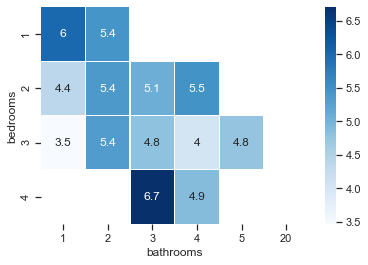

In [13]:
andres_index = (rent_price_per_bedroom_and_bathroom * 12) / buy_price_per_bedroom_and_bathroom * 100
sns.heatmap(andres_index, annot=True, linewidths=.100, cmap='Blues')

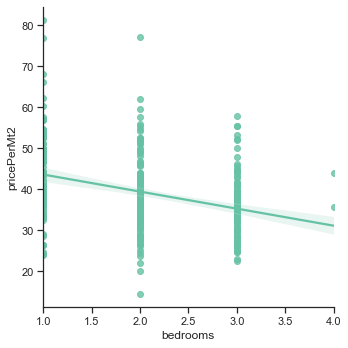

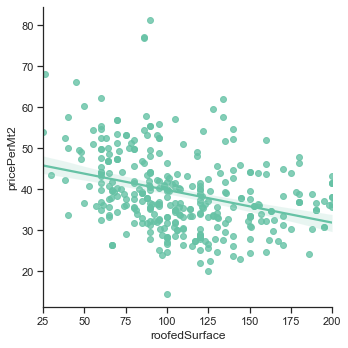

In [14]:
# Create the scatter plot
sns.lmplot(x="bedrooms", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# plt.show()

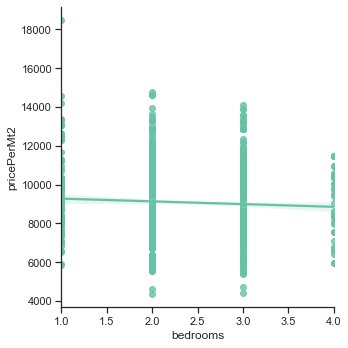

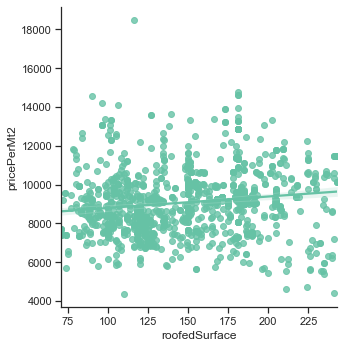

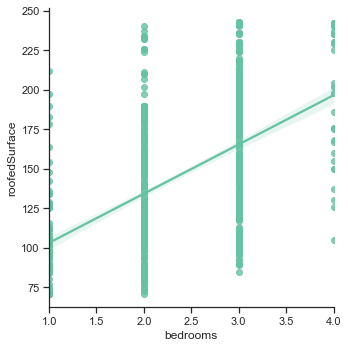

In [15]:
sns.lmplot(x="bedrooms", y="pricePerMt2", data=buy_df_filtered)
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="bedrooms", y="roofedSurface", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

In [16]:
buy_1x1_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 1]
buy_1x1_df_filtered = buy_1x1_df_filtered[buy_1x1_df_filtered.bathrooms == 1]
print(buy_1x1_df_filtered.describe())

        totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count   30.000000      30.000000      30.0       30.0      15.000000   
mean    91.233333      93.700000       1.0        1.0       0.933333   
std     21.175268      19.629587       0.0        0.0       0.258199   
min     70.000000      71.000000       1.0        1.0       0.000000   
25%     74.000000      74.000000       1.0        1.0       1.000000   
50%     89.500000      91.500000       1.0        1.0       1.000000   
75%    102.750000     104.750000       1.0        1.0       1.000000   
max    147.000000     142.000000       1.0        1.0       1.000000   

       antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  30.000000     18.000000  3.000000e+01             30.0     30.000000  
mean    1.700000      1.388889  8.154532e+05              6.0   8633.069705  
std     1.263547      0.501631  2.574837e+05              0.0   1846.646574  
min     1.000000      1.000000  4.93000

In [17]:
buy_2x2_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 2]
buy_2x2_df_filtered = buy_2x2_df_filtered[buy_2x2_df_filtered.bathrooms == 2]
print(buy_2x2_df_filtered.describe())

        totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count  189.000000     189.000000     189.0      189.0      74.000000   
mean   127.798942     119.666667       2.0        2.0       0.554054   
std     36.933405      29.713884       0.0        0.0       0.500463   
min     71.000000      71.000000       2.0        2.0       0.000000   
25%    102.000000     100.000000       2.0        2.0       0.000000   
50%    120.000000     119.000000       2.0        2.0       1.000000   
75%    142.000000     130.000000       2.0        2.0       1.000000   
max    248.000000     237.000000       2.0        2.0       1.000000   

        antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  189.000000    124.000000  1.890000e+02            189.0    189.000000  
mean     1.888889      1.508065  1.034665e+06              6.0   8662.038602  
std      1.326222      0.517906  3.023824e+05              0.0   1395.786653  
min      1.000000      1.000000  4.

# 5% Rule

In [18]:
buy_priceAmount_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='priceAmount', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_priceAmount_per_bedroom_and_bathroom)

bathrooms         1.0         2.0         3.0         4.0         5.0
bedrooms                                                             
1           815453.17  1087117.52  1166748.90  1206700.33         NaN
2          1277363.00  1034664.78  1289708.43  1428324.27  1796452.00
3          2029624.00  1110677.69  1502116.03  1819170.02  1619146.86
4          2392411.00   986704.00  1515911.62  1729491.00  2218339.42


In [19]:
five_percent_rule = buy_priceAmount_per_bedroom_and_bathroom * 0.1 / 12
print(five_percent_rule)

bathrooms           1.0          2.0           3.0           4.0           5.0
bedrooms                                                                      
1           6795.443083  9059.312667   9722.907500  10055.836083           NaN
2          10644.691667  8622.206500  10747.570250  11902.702250  14970.433333
3          16913.533333  9255.647417  12517.633583  15159.750167  13492.890500
4          19936.758333  8222.533333  12632.596833  14412.425000  18486.161833


In [20]:
rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='priceAmount', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
print(rent_price_per_bedroom_and_bathroom)

bathrooms       1        2        3        4       5       20
bedrooms                                                     
1          2682.18  4044.52      NaN      NaN     NaN     NaN
2          3271.92  3875.77  4860.54  5920.67     NaN     NaN
3          3841.67  4539.75  5022.29  5506.80  6640.0  3200.0
4              NaN      NaN  7670.00  4648.00     NaN     NaN


In [21]:
five_percent = rent_price_per_bedroom_and_bathroom / five_percent_rule

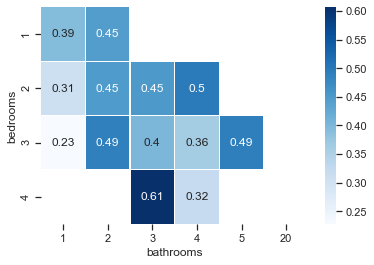

In [22]:
sns.heatmap(five_percent, annot=True, linewidths=.100, cmap='Blues')

In [23]:
rent_1x1_df_filtered = rent_df_filtered[rent_df_filtered.bedrooms == 1]
rent_1x1_df_filtered = rent_1x1_df_filtered[rent_1x1_df_filtered.bathrooms == 1]
print(rent_1x1_df_filtered.describe())

        totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count   65.000000      65.000000      65.0       65.0      43.000000   
mean    64.092308      63.492308       1.0        1.0       0.372093   
std     17.525627      17.801091       0.0        0.0       0.489083   
min     25.000000      25.000000       1.0        1.0       0.000000   
25%     60.000000      57.000000       1.0        1.0       0.000000   
50%     65.000000      64.000000       1.0        1.0       0.000000   
75%     70.000000      70.000000       1.0        1.0       1.000000   
max    135.000000     135.000000       1.0        1.0       1.000000   

       antiquity  parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
count  65.000000     37.000000    65.000000             65.0    65.000000  
mean    3.584615      1.027027  2682.184615              6.0    43.252302  
std     1.401922      0.164399   823.688994              0.0     9.757453  
min     1.000000      1.000000  1300.000000    

In [26]:
print(buy_df_filtered.describe())

          totalArea  roofedSurface     bedrooms    bathrooms  halfBathrooms  \
count   1207.000000    1207.000000  1207.000000  1206.000000     235.000000   
mean     178.409279     147.526098     2.425849     2.842454       0.544681   
std      691.295108      41.572719     0.691762     0.816869       0.515905   
min       38.000000      71.000000     1.000000     1.000000       0.000000   
25%      120.000000     114.000000     2.000000     2.000000       0.000000   
50%      150.000000     148.000000     2.000000     3.000000       1.000000   
75%      189.000000     181.000000     3.000000     3.000000       1.000000   
max    24106.000000     243.000000     4.000000     5.000000       2.000000   

         antiquity  parkingSlots   priceAmount  priceCurrencyId   pricePerMt2  
count  1207.000000   1007.000000  1.207000e+03           1207.0   1207.000000  
mean      1.897266      1.838133  1.348666e+06              6.0   9072.563434  
std       1.321860      0.682511  4.898564e+05  